# **Generazione di dataset sintetici con diversi livelli di privacy: no privacy, privacy moderata e privacy strong**

Determinareil trade-off tra livello di privacy e l'effettiva utilità del dataset sintetico

In [1]:
#SALVA TUTTE LE CARTELLE E FILE
!zip -r all_colab_files.zip /content

from google.colab import files
files.download("all_colab_files.zip")

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2025.12.09/ (stored 0%)
  adding: content/.config/logs/2025.12.09/14.41.18.717681.log (deflated 58%)
  adding: content/.config/logs/2025.12.09/14.41.42.675750.log (deflated 57%)
  adding: content/.config/logs/2025.12.09/14.40.47.605300.log (deflated 92%)
  adding: content/.config/logs/2025.12.09/14.41.33.792924.log (deflated 58%)
  adding: content/.config/logs/2025.12.09/14.41.27.893750.log (d

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
!pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.0/799.0 MB 522.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 134.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/19

In [3]:
import torch
if torch.cuda.is_available():
    print(f"GPU rilevata: {torch.cuda.get_device_name(0)}")
else:
    print("GPU NON rilevata. Controlla le impostazioni del Runtime.")

GPU rilevata: Tesla T4


In [4]:
!pip install --quiet sdv==1.29.1

!pip install --quiet ctgan==0.11.1

!pip install smartnoise-synth==1.0.5

!pip install --quiet xgboost joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.0/197.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.3/114.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 

In [5]:
import os
import pandas as pd
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import evaluate_quality

from sdv.evaluation.single_table import evaluate_quality, run_diagnostic, get_column_plot

from xgboost import XGBClassifier
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [6]:
def carica_dataset():
    path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
    csv_path = os.path.join(path, "diabetes_binary_health_indicators_BRFSS2015.csv")
    df = pd.read_csv(csv_path)
    df = df.rename(columns={'Diabetes_binary': 'outcome'})
    print(f"Dataset caricato: {df.shape[0]} righe e {df.shape[1]} colonne")
    return df

def preprocessa_dataset(df):
    df = df.astype(float)
    df = df.astype('int64')
    return df

# Crea le directory se non esistono
os.makedirs("dataset/real", exist_ok=True)
os.makedirs("dataset/synthetic", exist_ok=True)
os.makedirs("models", exist_ok=True)

df = carica_dataset()
df = preprocessa_dataset(df)
df.info()

train_df, holdout_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['outcome']
)

train_df.to_csv('dataset/real/diabetes_train.csv', index=False)
holdout_df.to_csv('dataset/real/diabetes_holdout.csv', index=False)

print(f"Dimensione train: {train_df.shape}")
print(f"Dimensione holdout: {holdout_df.shape}")

100%|██████████| 6.03M/6.03M [00:00<00:00, 8.28MB/s]

Extracting files...


Dataset caricato: 253680 righe e 22 colonne
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   outcome               253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  i

## **GENERAZIONE DATI SINTETICI**

### NO PRIVACY

In [7]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

#INIZIALE L'HO PROVATO L'ULTIMA VOLTA ED è OK
def synthetic_no_privacy(df):

    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(df)

    for col in df.columns:
        if col in ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']:
            metadata.update_column(col, sdtype='numerical')
        else:
            metadata.update_column(col, sdtype='categorical')

    model = CTGANSynthesizer(
        metadata,
        epochs=50,
        batch_size=2000,
        generator_dim=(256, 256, 256),
        discriminator_dim=(256, 256, 256),
        verbose=True,
        pac=10,
        cuda=True
    )

    print("Inizio addestramento CTGAN su dataset CDC...")
    model.fit(df)

    num_samples = len(df)
    print(f"Generazione di {num_samples} campioni...")
    synthetic = model.sample(num_samples)

    os.makedirs("models", exist_ok=True)
    model.save("models/ctgan_no_privacy_cdc.pkl")

    return synthetic, metadata

synthetic_noprivacy, metadata_noprivacy = synthetic_no_privacy(train_df)
synthetic_noprivacy.to_csv('dataset/synthetic/synthetic_no_privacy.csv', index=False)

Inizio addestramento CTGAN su dataset CDC...


Gen. (-3.57) | Discrim. (0.00): 100%|██████████| 50/50 [05:12<00:00,  6.24s/it]


Generazione di 202944 campioni...


In [8]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

def synthetic_no_privacy(df):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Device rilevato: {device}")
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(df)

    for col in df.columns:
        if col in ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']:
            metadata.update_column(col, sdtype='numerical')
        else:
            metadata.update_column(col, sdtype='categorical')

    # 3. Modello CTGAN ottimizzato per grandi volumi
    model = CTGANSynthesizer(
        metadata,
        epochs=100,
        batch_size=4000,
        verbose=True,
        pac=10,
        cuda=device
    )

    print(f"Inizio training CTGAN su {device}...")
    model.fit(df)

    # 4. Genera dati sintetici
    num_samples = len(df)
    print(f"Generazione di {num_samples} campioni...")
    synthetic = model.sample(num_samples)

    # 5. Salvataggio
    os.makedirs("models", exist_ok=True)
    model.save("models/ctgan_no_privacy_cdc.pkl")

    return synthetic, metadata

# Esecuzione
synthetic_noprivacy, metadata_noprivacy = synthetic_no_privacy(train_df)
synthetic_noprivacy.to_csv('dataset/synthetic/synthetic_no_privacy.csv', index=False)

Device rilevato: cuda
Inizio training CTGAN su cuda...


Gen. (-3.12) | Discrim. (0.04): 100%|██████████| 100/100 [07:00<00:00,  4.20s/it]


Generazione di 202944 campioni...


In [9]:
#MODELLO DP-CTGAN INIZIALE
from snsynth import Synthesizer
from sdv.metadata import SingleTableMetadata
import os


def synthetic_dp_dpctgan1(df, epsilon,model_path):
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(data=df)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Device rilevato: {device}")
    synth = Synthesizer.create(
        synth="dpctgan",
        epsilon=epsilon,
        verbose=True,
        epochs=30,
        batch_size=4000,
        cuda=device
    )
    synth.fit(
        df,
        preprocessor_eps=epsilon * 0.2
    )
    df_synt = synth.sample(len(df))

    return df_synt, metadata


In [10]:
#MODELLO DP-CTGAN
from snsynth import Synthesizer
from sdv.metadata import SingleTableMetadata
import os


def synthetic_dp_dpctgan(df, epsilon,model_path):
    import torch
    import gc

    # Pulizia memoria GPU
    gc.collect()
    torch.cuda.empty_cache()
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Device rilevato: {device}")
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(data=df)
    """
    synth = Synthesizer.create(
        synth="dpctgan",
        epsilon=epsilon,
        verbose=True,
        epochs=30,
        batch_size=8000,
        cuda=device
    )
    synth = Synthesizer.create(
        synth="dpctgan",
        epsilon=epsilon,
        verbose=True,
        epochs=200,
        batch_size=4000,
        cuda=device
    )"""
    #ci mette tanto e non arriva a e=4.0
    synth = Synthesizer.create(
        synth="dpctgan",
        epsilon=epsilon,
        verbose=True,
        epochs=200,
        batch_size=2000,
        generator_dim=(256, 256),
        discriminator_dim=(256, 256),
        cuda=device
    )

    print(f"Inizio training DP-CTGAN (ε={epsilon}) su {device}...")

    synth.fit(
        df,
        preprocessor_eps=epsilon * 0.1
    )

    df_synt = synth.sample(len(df))

    return df_synt, metadata

In [11]:
# PRIVACY MODERATA
print("Generazione privacy moderata...")
synthetic_mod, metadata_mod = synthetic_dp_dpctgan1(train_df, epsilon=6.0,model_path="models/privacy_moderata.pkl") #prova con 4.0 perchè con 6 è troppo simile
synthetic_mod.to_csv("dataset/synthetic/synthetic_privacy_moderata.csv", index=False)

Generazione privacy moderata...
Device rilevato: cuda
Epoch 1, Loss G: 0.6594, Loss D: 1.3842
epsilon is 0.21283664753187329, alpha is 63.0
Epoch 2, Loss G: 0.6590, Loss D: 1.3966
epsilon is 0.2653816577679187, alpha is 63.0
Epoch 3, Loss G: 0.6776, Loss D: 1.3869
epsilon is 0.31792666800396413, alpha is 63.0
Epoch 4, Loss G: 0.6836, Loss D: 1.3865
epsilon is 0.37047167824000954, alpha is 63.0
Epoch 5, Loss G: 0.6730, Loss D: 1.3861
epsilon is 0.42301668847605495, alpha is 63.0
Epoch 6, Loss G: 0.6729, Loss D: 1.3931
epsilon is 0.47379614895111843, alpha is 58.0
Epoch 7, Loss G: 0.6692, Loss D: 1.3894
epsilon is 0.520048081148514, alpha is 54.0
Epoch 8, Loss G: 0.6633, Loss D: 1.3915
epsilon is 0.5627243877293353, alpha is 50.0
Epoch 9, Loss G: 0.6537, Loss D: 1.3945
epsilon is 0.6026087005630092, alpha is 47.0
Epoch 10, Loss G: 0.6632, Loss D: 1.3894
epsilon is 0.6402306988365198, alpha is 45.0
Epoch 11, Loss G: 0.6532, Loss D: 1.3833
epsilon is 0.6758865440204073, alpha is 42.0
Epoch

In [12]:
# PRIVACY STRONG
print("Generazione privacy forte ...")
synthetic_strong, metadata_strong = synthetic_dp_dpctgan1(train_df, epsilon=1.0,model_path="models/privacy_moderata.pkl")
synthetic_strong.to_csv("dataset/synthetic/synthetic_privacy_strong.csv", index=False)

Generazione privacy forte ...
Device rilevato: cuda
Epoch 1, Loss G: 0.6619, Loss D: 1.3836
epsilon is 0.21283664753187329, alpha is 63.0
Epoch 2, Loss G: 0.6568, Loss D: 1.3994
epsilon is 0.2653816577679187, alpha is 63.0
Epoch 3, Loss G: 0.6748, Loss D: 1.3893
epsilon is 0.31792666800396413, alpha is 63.0
Epoch 4, Loss G: 0.6833, Loss D: 1.3859
epsilon is 0.37047167824000954, alpha is 63.0
Epoch 5, Loss G: 0.6704, Loss D: 1.3870
epsilon is 0.42301668847605495, alpha is 63.0
Epoch 6, Loss G: 0.6626, Loss D: 1.3981
epsilon is 0.47379614895111843, alpha is 58.0
Epoch 7, Loss G: 0.6553, Loss D: 1.3944
epsilon is 0.520048081148514, alpha is 54.0
Epoch 8, Loss G: 0.6560, Loss D: 1.3916
epsilon is 0.5627243877293353, alpha is 50.0
Epoch 9, Loss G: 0.6306, Loss D: 1.3968
epsilon is 0.6026087005630092, alpha is 47.0
Epoch 10, Loss G: 0.6482, Loss D: 1.3841
epsilon is 0.6402306988365198, alpha is 45.0
Epoch 11, Loss G: 0.6222, Loss D: 1.4005
epsilon is 0.6758865440204073, alpha is 42.0
Epoch 1

### **VALUTAZIONE SOMIGLIANZA STATISTICA**

ANALISI QUALITA' DEI DATI SINTETICI

In [13]:
def valuta_qualita_dataset(real, synth, metadata, nome=""):
    print(f"\n===== ANALISI QUALITÀ: {nome} =====")

    # 1) DIAGNOSTICA
    print("\n--- Diagnostic Report ---")
    diagnostic = run_diagnostic(
        real_data=real,
        synthetic_data=synth,
        metadata=metadata
    )

    # 2) QUALITY REPORT
    quality_report = evaluate_quality(
        real_data=real,
        synthetic_data=synth,
        metadata=metadata,
        verbose=False
    )
    print("\n--- Quality Score ---")
    print(quality_report.get_score())

    return diagnostic, quality_report

datasets_sintetici = [
    ("NO PRIVACY", synthetic_noprivacy, metadata_noprivacy),
    ("PRIVACY MODERATA", synthetic_mod, metadata_mod),
    ("PRIVACY STRONG", synthetic_strong, metadata_strong)
]

diagnostics = {}
quality_reports = {}

for nome, synth_df, meta in datasets_sintetici:
    diag, q_report = valuta_qualita_dataset(df, synth_df, meta, nome)
    diagnostics[nome] = diag
    quality_reports[nome] = q_report



===== ANALISI QUALITÀ: NO PRIVACY =====

--- Diagnostic Report ---
Generating report ...

(1/2) Evaluating Data Validity: |██████████| 22/22 [00:00<00:00, 130.25it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 265.82it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%


--- Quality Score ---
0.8787050427226297

===== ANALISI QUALITÀ: PRIVACY MODERATA =====

--- Diagnostic Report ---
Generating report ...

(1/2) Evaluating Data Validity: |██████████| 22/22 [00:00<00:00, 109.58it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 240.33it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%


--- Quality Score ---
0.8703496847218659

===== ANALISI QUALITÀ: PRIVACY STRONG =====

--- Diagnostic Report ---
Generating report ...

(1/2) Evaluating Data Validity: |██████████| 22/22 [00:00<00:00, 170.93it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure:

ANALISI SOMIGLIANZA STATISTICA DEI DATI SINTETICI


===== ANALISI SOMIGLIANZA STATISTICA: NO PRIVACY =====

Confronto delle medie tra reale e sintetico:
Feature                         Mean Real   Mean Synthetic         Diff
outcome                            0.1393           0.2750       0.1356
HighBP                             0.4290           0.5089       0.0799
HighChol                           0.4241           0.5276       0.1035
CholCheck                          0.9627           0.9114      -0.0513
BMI                               28.3824          28.3147      -0.0677
Smoker                             0.4432           0.4503       0.0072
Stroke                             0.0406           0.1339       0.0933
HeartDiseaseorAttack               0.0942           0.2446       0.1504
PhysActivity                       0.7565           0.6428      -0.1138
Fruits                             0.6343           0.7441       0.1098
Veggies                            0.8114           0.6678      -0.1436
HvyAlcoholConsump                 

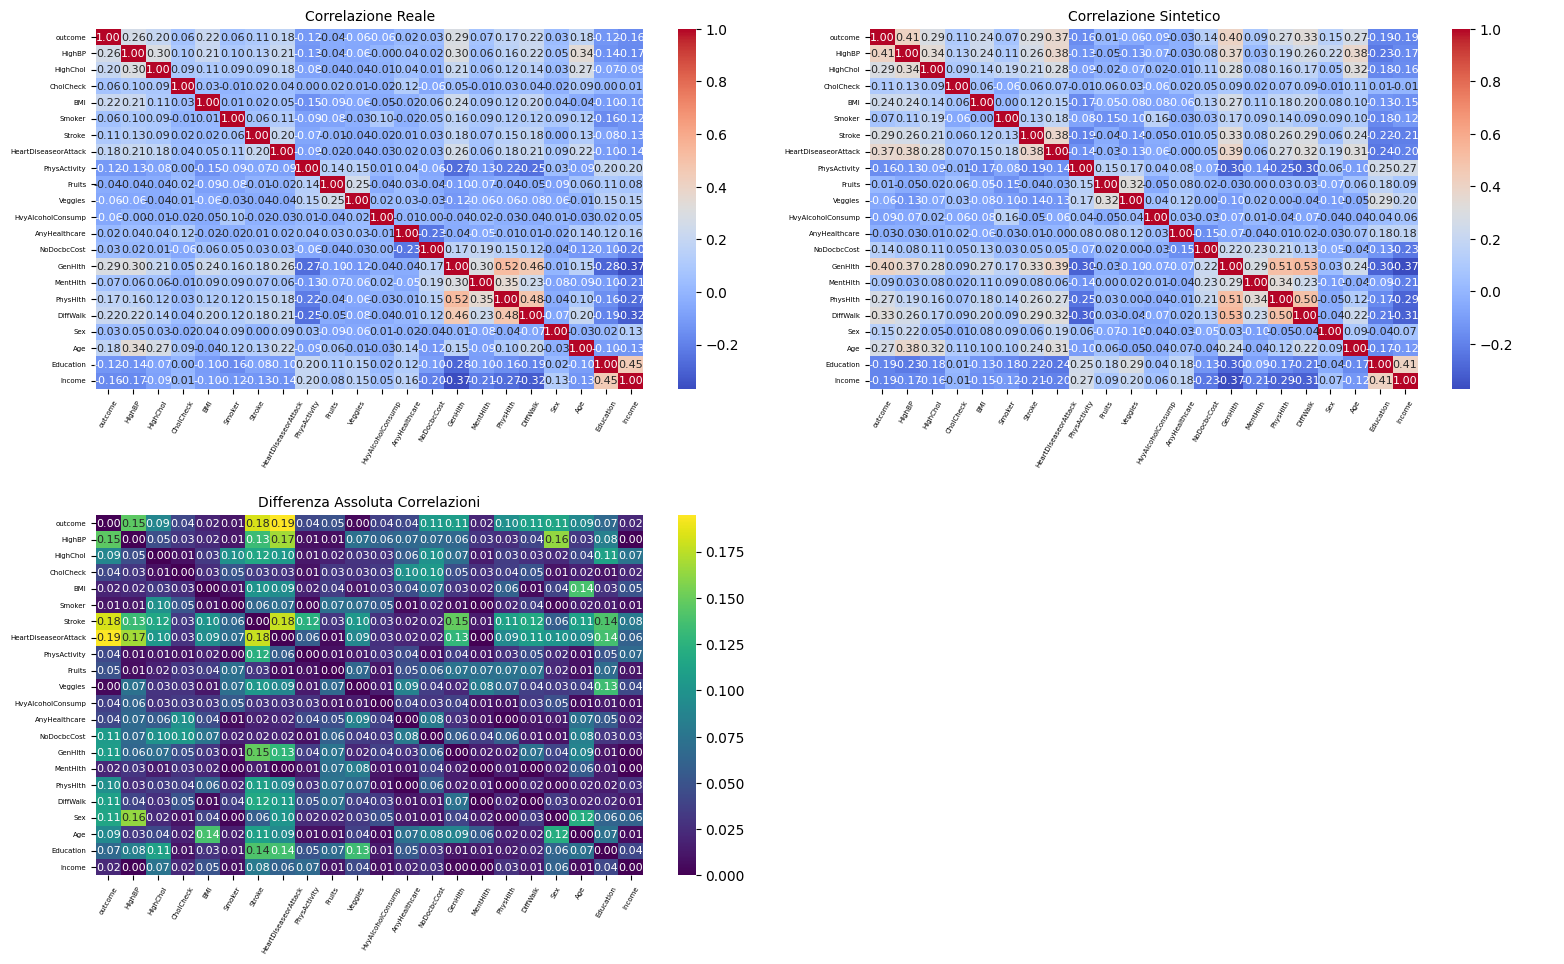

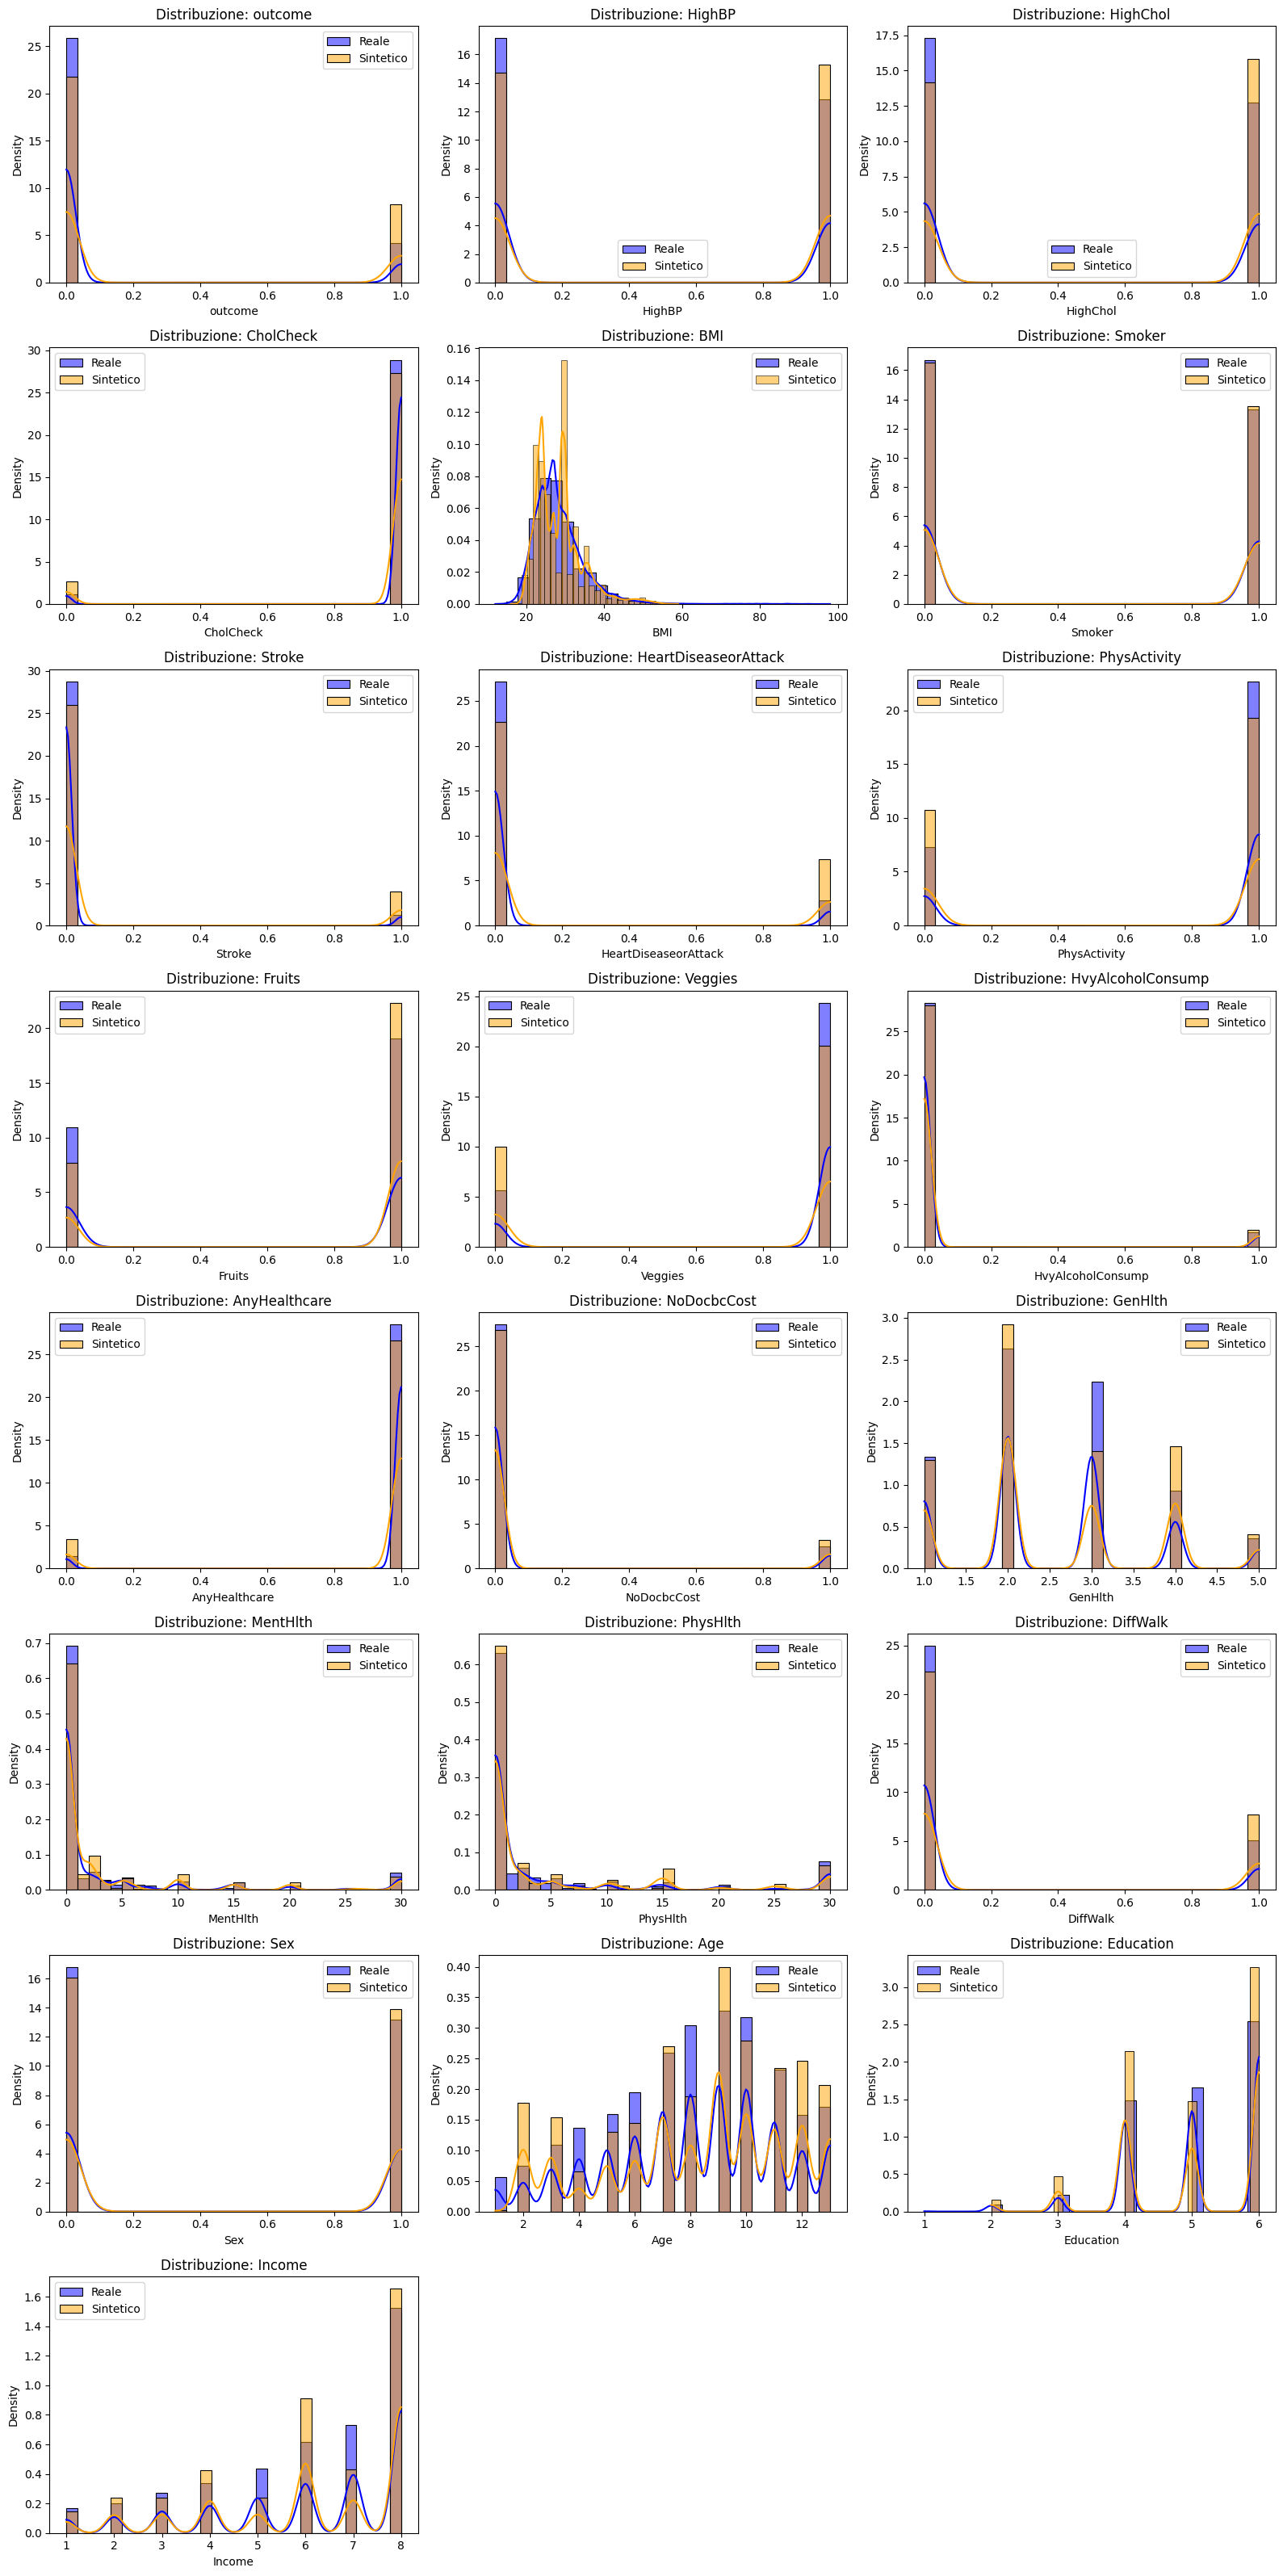


Test di similarità distribuzionale (Wasserstein e Jensen-Shannon):
Feature                           Wasserstein       Jensen-Shannon
outcome                                0.1356               0.0142
HighBP                                 0.0799               0.0032
HighChol                               0.1035               0.0054
CholCheck                              0.0513               0.0057
BMI                                    0.5407               0.1432
Smoker                                 0.0072               0.0000
Stroke                                 0.0933               0.0143
HeartDiseaseorAttack                   0.1504               0.0207
PhysActivity                           0.1138               0.0077
Fruits                                 0.1098               0.0071
Veggies                                0.1436               0.0135
HvyAlcoholConsump                      0.0105               0.0002
AnyHealthcare                          0.0643               0

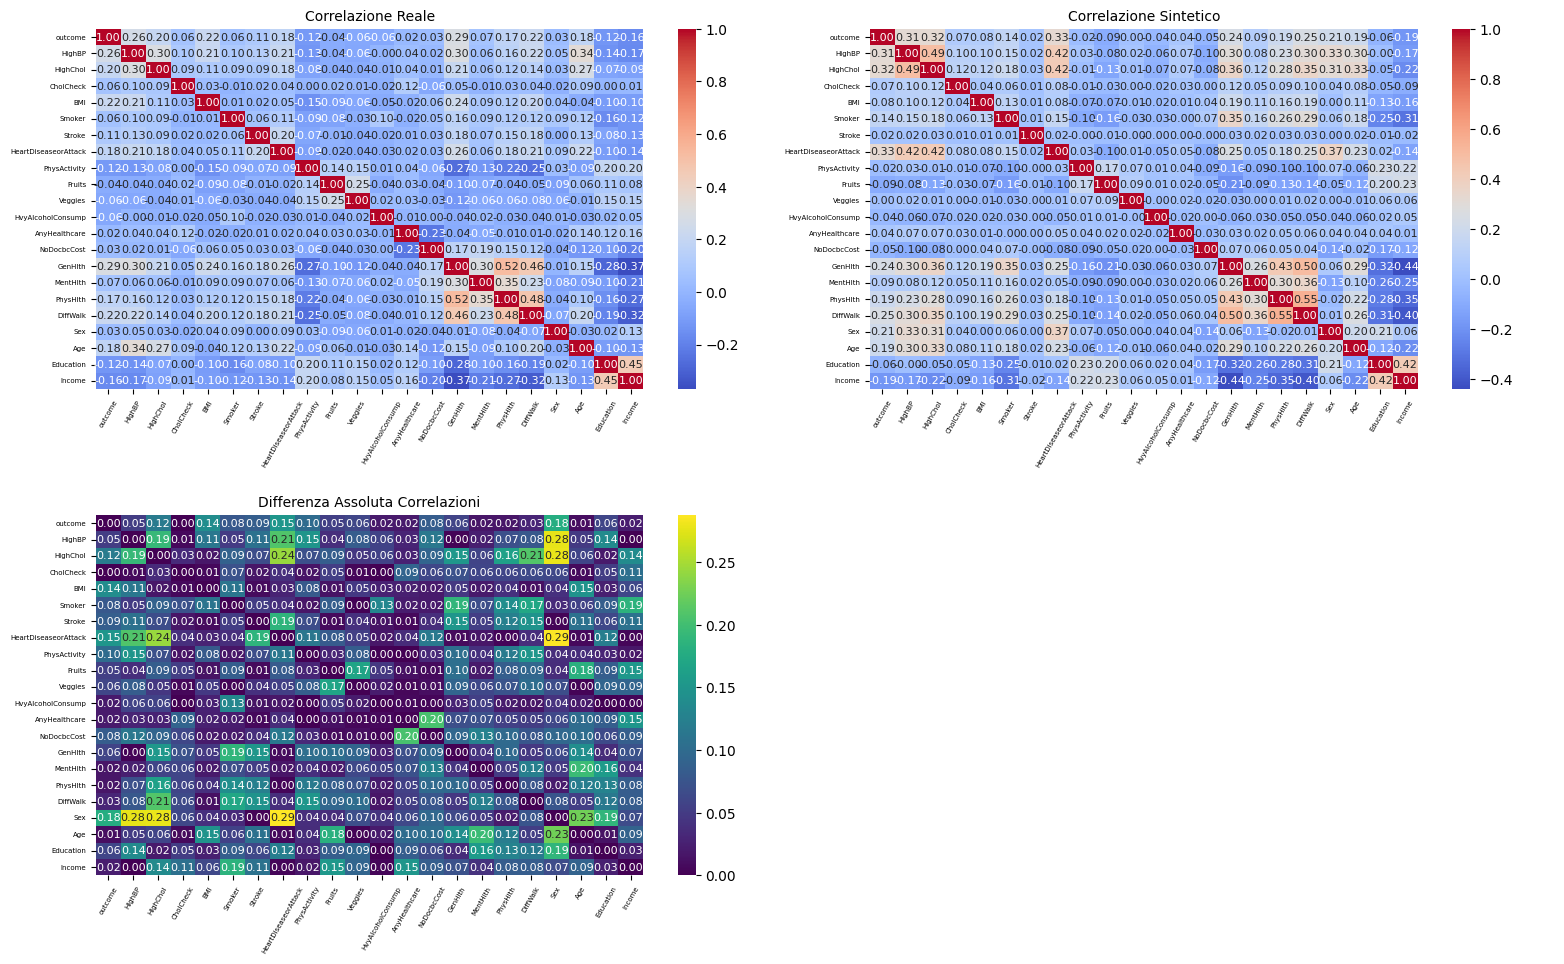

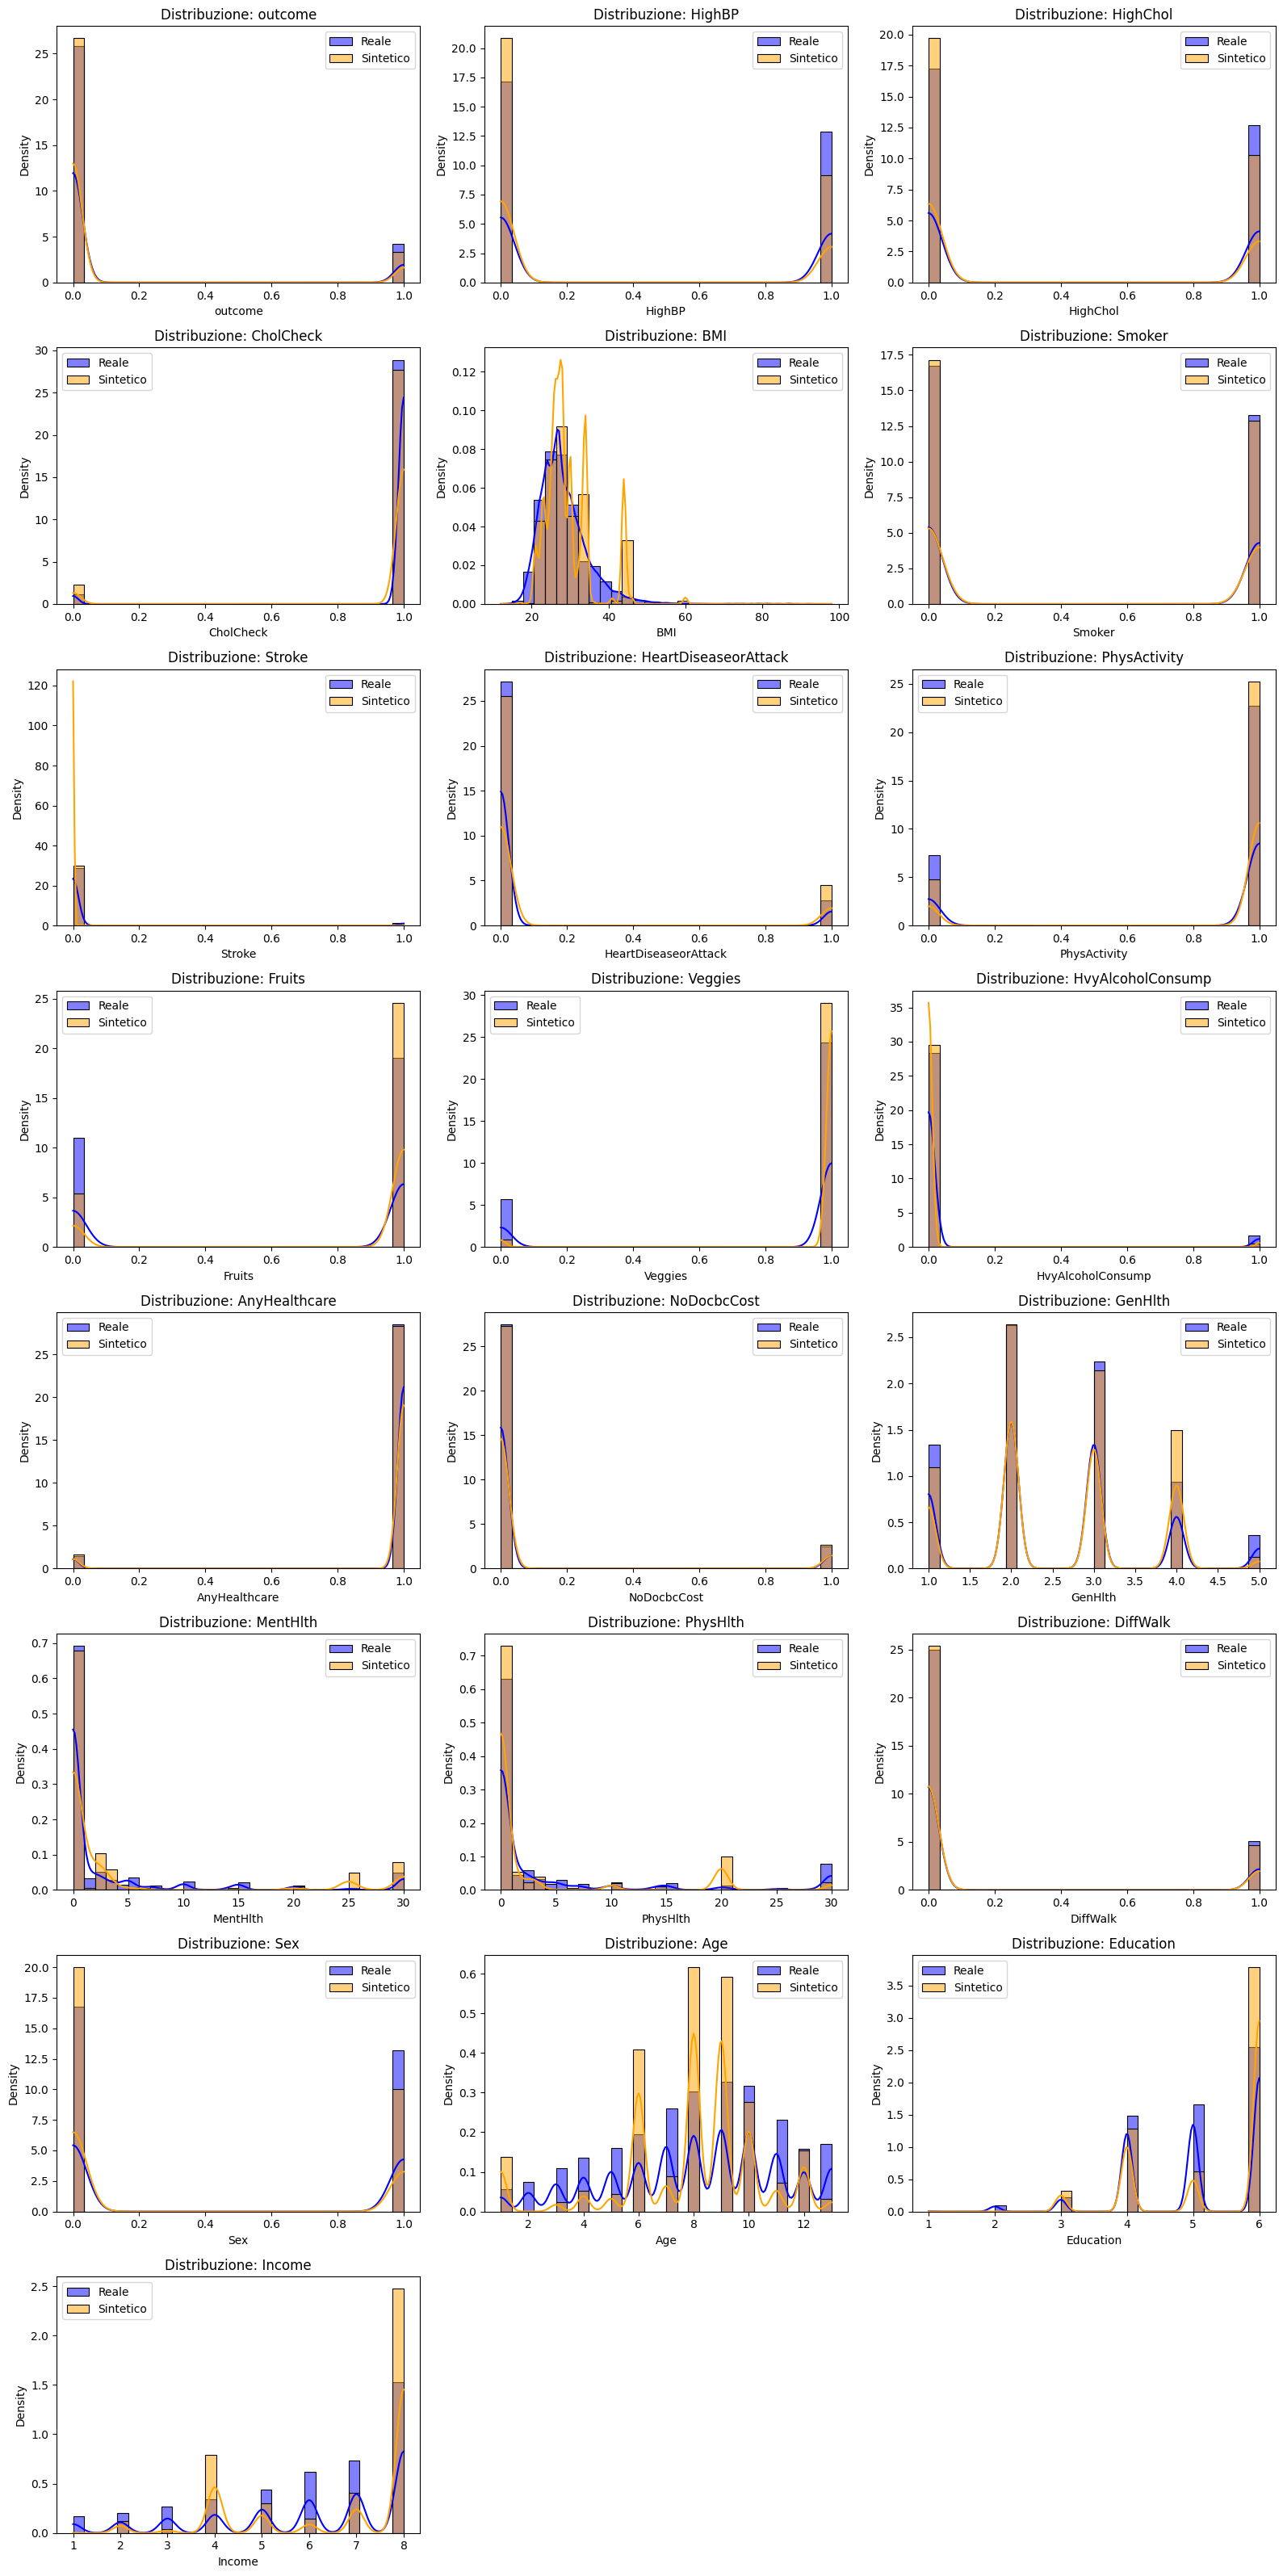


Test di similarità distribuzionale (Wasserstein e Jensen-Shannon):
Feature                           Wasserstein       Jensen-Shannon
outcome                                0.0283               0.0009
HighBP                                 0.1234               0.0082
HighChol                               0.0808               0.0035
CholCheck                              0.0397               0.0037
BMI                                    1.5356               0.0998
Smoker                                 0.0147               0.0001
Stroke                                 0.0392               0.0117
HeartDiseaseorAttack                   0.0552               0.0036
PhysActivity                           0.0854               0.0057
Fruits                                 0.1853               0.0220
Veggies                                0.1576               0.0349
HvyAlcoholConsump                      0.0399               0.0060
AnyHealthcare                          0.0060               0

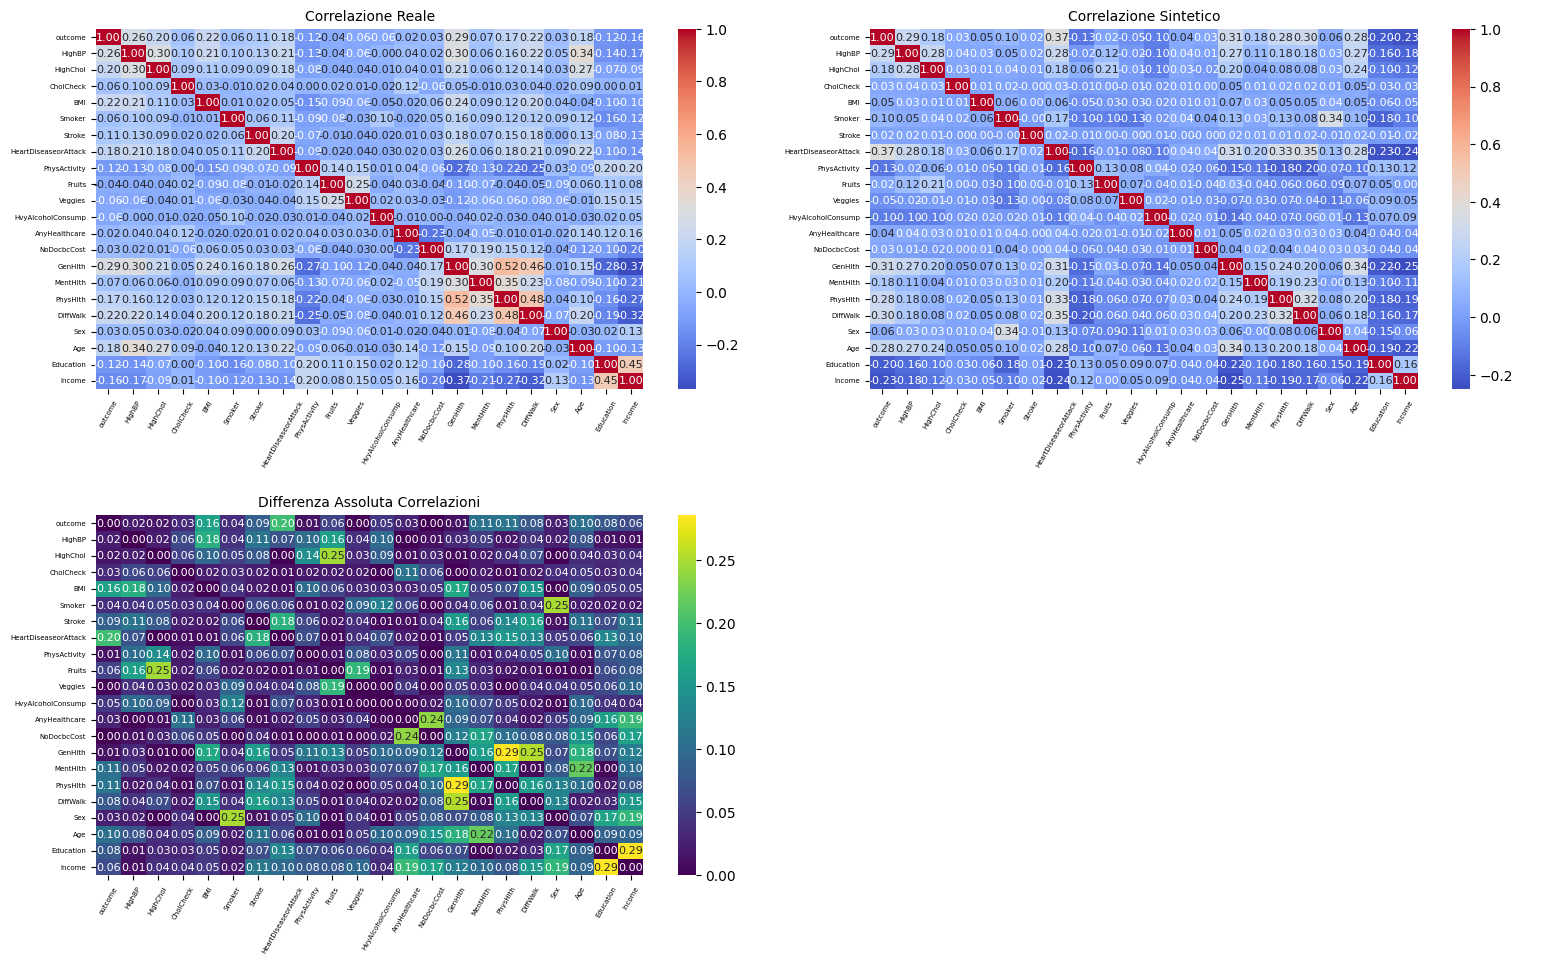

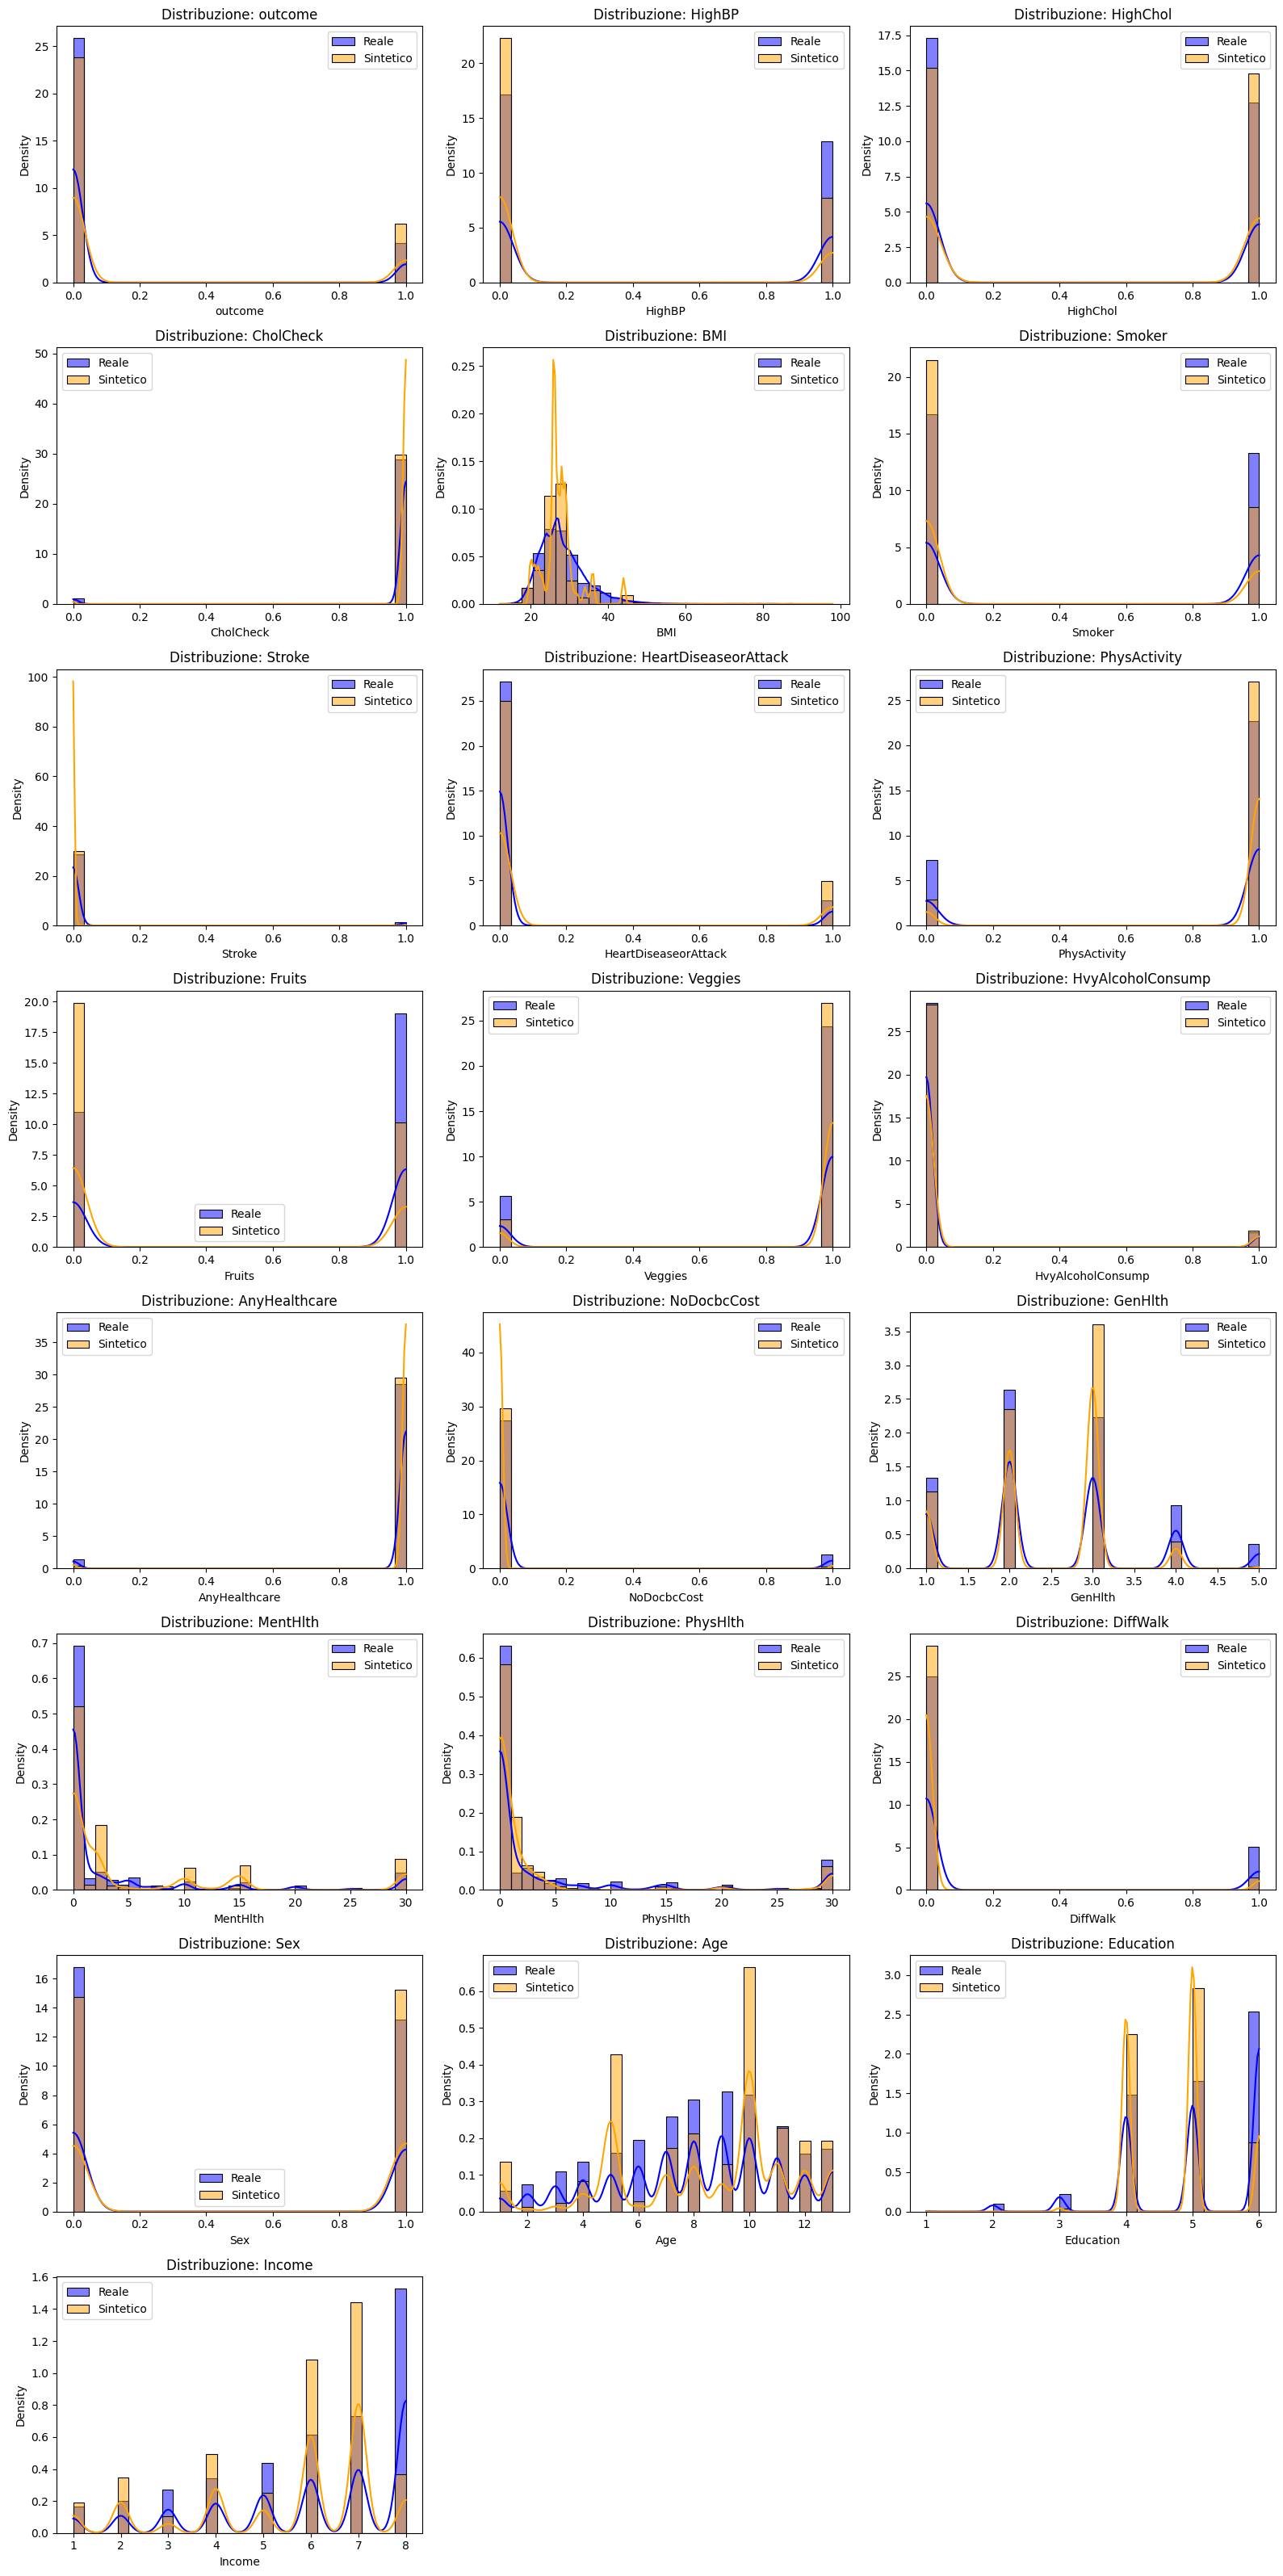


Test di similarità distribuzionale (Wasserstein e Jensen-Shannon):
Feature                           Wasserstein       Jensen-Shannon
outcome                                0.0677               0.0040
HighBP                                 0.1715               0.0164
HighChol                               0.0694               0.0024
CholCheck                              0.0285               0.0048
BMI                                    1.7955               0.0982
Smoker                                 0.1595               0.0138
Stroke                                 0.0384               0.0107
HeartDiseaseorAttack                   0.0715               0.0057
PhysActivity                           0.1470               0.0197
Fruits                                 0.2971               0.0448
Veggies                                0.0874               0.0078
HvyAlcoholConsump                      0.0083               0.0002
AnyHealthcare                          0.0344               0

In [14]:
from scipy.stats import ks_2samp, ttest_ind, levene, chi2_contingency
from scipy.stats import wasserstein_distance, entropy

def jensen_shannon(p, q, bins=50):
        p_hist, _ = np.histogram(p, bins=bins, density=True)
        q_hist, _ = np.histogram(q, bins=bins, density=True)
        p_prob = p_hist / np.sum(p_hist)
        q_prob = q_hist / np.sum(q_hist)
        m = 0.5 * (p_prob + q_prob)
        return 0.5 * (entropy(p_prob, m) + entropy(q_prob, m))

def somiglianza_statistica(real, synth, metadata, nome=""):
    print(f"\n===== ANALISI SOMIGLIANZA STATISTICA: {nome} =====")

    num_cols = [col for col in real.columns if pd.api.types.is_numeric_dtype(real[col])]
    cat_cols = [col for col in real.columns if pd.api.types.is_categorical_dtype(real[col])
                or real[col].nunique() < 20]
    print("\nConfronto delle medie tra reale e sintetico:")
    print("{:<28} {:>12} {:>16} {:>12}".format('Feature', 'Mean Real', 'Mean Synthetic', 'Diff'))
    for col in num_cols:
        mean_real = real[col].mean()
        mean_synth = synth[col].mean()
        diff = mean_synth - mean_real
        print("{:<28} {:>12.4f} {:>16.4f} {:>12.4f}".format(col, mean_real, mean_synth, diff))

    # 2. Confronto MATRICE DI CORRELAZIONE
    print("\nConfronto MATRICE DI CORRELAZIONE:")
    real_corr = real[num_cols].corr()
    synth_corr = synth[num_cols].corr()
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    # Prima riga:
    sns.heatmap(real_corr, ax=axes[0, 0], cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size":8})
    axes[0, 0].set_title('Correlazione Reale', fontsize=10)
    axes[0, 0].tick_params(axis='x', labelsize=5, rotation=60)
    axes[0, 0].tick_params(axis='y', labelsize=5)
    sns.heatmap(synth_corr, ax=axes[0, 1], cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size":8})
    axes[0, 1].set_title('Correlazione Sintetico', fontsize=10)
    axes[0, 1].tick_params(axis='x', labelsize=5, rotation=60)
    axes[0, 1].tick_params(axis='y', labelsize=5)
    # Seconda riga:
    axes[1, 1].axis('off')
    sns.heatmap(abs(real_corr - synth_corr), ax=axes[1, 0], cmap='viridis', annot=True, fmt='.2f', annot_kws={"size":8})
    axes[1, 0].set_title('Differenza Assoluta Correlazioni', fontsize=10)
    axes[1, 0].tick_params(axis='x', labelsize=5, rotation=60)
    axes[1, 0].tick_params(axis='y', labelsize=5)
    plt.tight_layout(pad=2)
    plt.show()

    # 3. Confronto DISTRIBUZIONI
    num_per_row = 3
    num_cols_total = len(num_cols)
    num_rows = int(np.ceil(num_cols_total / num_per_row))
    fig_width = 16
    fig_height = 4 * num_rows
    fig, axes = plt.subplots(num_rows, num_per_row, figsize=(fig_width, fig_height))
    axes = axes.flatten()
    for ax, col in zip(axes, num_cols):
        sns.histplot(real[col], color='blue', label='Reale', kde=True, stat="density", bins=30, alpha=0.5, ax=ax)
        sns.histplot(synth[col], color='orange', label='Sintetico', kde=True, stat="density", bins=30, alpha=0.5, ax=ax)
        ax.set_title(f'Distribuzione: {col}')
        ax.set_ylabel('Density')
        ax.set_xlabel(col)
        ax.legend()
    for ax in axes[len(num_cols):]:
        ax.set_visible(False)
    plt.tight_layout()
    plt.show()

    # 4. TEST STATISTICI
    print("\nTest di similarità distribuzionale (Wasserstein e Jensen-Shannon):")
    print("{:<28} {:>16} {:>20}".format('Feature', 'Wasserstein', 'Jensen-Shannon'))
    for col in num_cols:
        w_dist = wasserstein_distance(real[col], synth[col])
        js_div = jensen_shannon(real[col], synth[col])
        print("{:<28} {:>16.4f} {:>20.4f}".format(col, w_dist, js_div))



datasets_sintetici = [
    ("NO PRIVACY", synthetic_noprivacy, metadata_noprivacy),
    ("PRIVACY MODERATA", synthetic_mod, metadata_mod),
    ("PRIVACY STRONG", synthetic_strong, metadata_strong)
]

for nome, synth_df, meta in datasets_sintetici:
    somiglianza_statistica(df, synth_df, meta, nome)


### **VALUTARE UTILITA' PER LA RICERCA**: addestrare modelli di predizione delle malattie su dati sintetici e valutarli su un set reale di holdout

**TRINING DEI MODELLI CON I DIVERSI DATASET SINTETICI GENERATI (NO PRIVACY, MODERATA, STRONG)**

In [15]:
import joblib
from xgboost import XGBClassifier
import pandas as pd

def train_and_save_xgboost(synthetic_df, privacy_label, model_params=None, target_col="outcome"):
    """
    Allena un modello XGBoost su un dataset sintetico e lo salva
    """
    # Calcolo dinamico dello sbilanciamento
    counts = synthetic_df[target_col].value_counts()
    # Se mancano esempi della classe 1 (rari in Strong Privacy), evitiamo divisioni per zero
    num_neg = counts.get(0, 1)
    num_pos = counts.get(1, 1)
    scale_weight = num_neg / num_pos

    if model_params is None:

        model_params = dict(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=5,
            subsample=0.8,
            colsample_bytree=0.8,
            eval_metric="logloss",
            random_state=42,
            tree_method="hist",
            device="cuda",
            scale_pos_weight=scale_weight
        )

    X = synthetic_df.drop(columns=[target_col])
    y = synthetic_df[target_col]
    model = XGBClassifier(**model_params)
    model.fit(X, y)
    filename = f'xgboost_model_{privacy_label}.pkl'
    joblib.dump(model, filename)
    print(f"Modello XGBoost addestrato e salvato: {filename}")
    return model

print("Training modello con dataset di train reale...")
model_real = train_and_save_xgboost(train_df, "real")

# Allena 3 modelli con diversi i dataset sintetici di input
print("Training modello con dataset NO PRIVACY...")
model_noprivacy = train_and_save_xgboost(synthetic_noprivacy, "noprivacy")
print("Training modello con dataset PRIVACY MODERATA...")
model_modprivacy = train_and_save_xgboost(synthetic_mod, "modprivacy")
print("Training modello con dataset PRIVACY STRONG...")
model_strongprivacy = train_and_save_xgboost(synthetic_strong, "strongprivacy")


Training modello con dataset di train reale...
Modello XGBoost addestrato e salvato: xgboost_model_real.pkl
Training modello con dataset NO PRIVACY...
Modello XGBoost addestrato e salvato: xgboost_model_noprivacy.pkl
Training modello con dataset PRIVACY MODERATA...
Modello XGBoost addestrato e salvato: xgboost_model_modprivacy.pkl
Training modello con dataset PRIVACY STRONG...
Modello XGBoost addestrato e salvato: xgboost_model_strongprivacy.pkl


In [16]:
#NUOVO MODO CON thresholds
from sklearn.metrics import precision_recall_curve, f1_score
results = []

def test_xgboost_model(model, X_real, y_real, privacy_label):
    y_prob = model.predict_proba(X_real)[:, 1]

    # 1. Trova la soglia migliore basata sull'F1-score
    precision, recall, thresholds = precision_recall_curve(y_real, y_prob)
    fscore = (2 * precision * recall) / (precision + recall + 1e-9)

    # Trova l'indice del miglior F1-score
    ix = np.argmax(fscore)
    # Importante: thresholds ha lunghezza N-1 rispetto a precision/recall
    best_thresh = thresholds[ix] if ix < len(thresholds) else thresholds[-1]

    # 2. Applica la nuova soglia
    y_pred_tuned = (y_prob >= best_thresh).astype(int)

    acc = accuracy_score(y_real, y_pred_tuned)
    auc = roc_auc_score(y_real, y_prob)

    print(f"\n--- MODELLO {privacy_label.upper()} (Tuned Threshold: {best_thresh:.3f}) ---")
    print(f"Accuracy: {acc:.4f} | ROC-AUC: {auc:.4f}")
    report_str = classification_report(y_real, y_pred_tuned)
    print(report_str)

    # Salva i risultati
    report = classification_report(y_real, y_pred_tuned, output_dict=True)
    results.append({
        "privacy_level": privacy_label,
        "best_threshold": best_thresh,
        "roc_auc": auc,
        "f1_1": report["1"]["f1-score"],
        "recall_1": report["1"]["recall"],
        "precision_1": report["1"]["precision"]
    })

# Separa feature e target nel dataset holdout (lo fai una sola volta)
X_real = holdout_df.drop(columns=["outcome"])
y_real = holdout_df["outcome"]

print("Distribuzione outcome nel test set:")
print(y_real.value_counts(normalize=True))

test_xgboost_model(model_real, X_real, y_real, "real")
# Usa la funzione per tutti i modelli
test_xgboost_model(model_noprivacy, X_real, y_real, "no privacy")
test_xgboost_model(model_modprivacy, X_real, y_real, "moderate privacy")
test_xgboost_model(model_strongprivacy, X_real, y_real, "strong privacy")


Distribuzione outcome nel test set:
outcome
0    0.860671
1    0.139329
Name: proportion, dtype: float64

--- MODELLO REAL (Tuned Threshold: 0.668) ---
Accuracy: 0.8144 | ROC-AUC: 0.8273
              precision    recall  f1-score   support

           0       0.93      0.85      0.89     43667
           1       0.39      0.59      0.47      7069

    accuracy                           0.81     50736
   macro avg       0.66      0.72      0.68     50736
weighted avg       0.85      0.81      0.83     50736


--- MODELLO NO PRIVACY (Tuned Threshold: 0.542) ---
Accuracy: 0.7717 | ROC-AUC: 0.8020
              precision    recall  f1-score   support

           0       0.93      0.79      0.86     43667
           1       0.33      0.64      0.44      7069

    accuracy                           0.77     50736
   macro avg       0.63      0.72      0.65     50736
weighted avg       0.85      0.77      0.80     50736


--- MODELLO MODERATE PRIVACY (Tuned Threshold: 0.582) ---
Accuracy: 0.

**TEST DEI MODELLI SU DATI REALI HOLDOUT**

In [17]:
results = []

def test_xgboost_model(model, X_real, y_real, privacy_label):
    y_pred = model.predict(X_real)
    y_prob = model.predict_proba(X_real)[:, 1]

    acc = accuracy_score(y_real, y_pred)
    auc = roc_auc_score(y_real, y_prob)

    print(f"\nPerformance del modello allenato su dati {privacy_label.upper()} e testato su Dataset Reale di Holdout")
    print("Accuracy:", acc)
    print("ROC-AUC:", auc)
    print("\nClassification Report:")
    report = classification_report(y_real, y_pred, output_dict=True)
    print(classification_report(y_real, y_pred))

    # Salva tutte le info
    results.append({
        "privacy_level": privacy_label,
        "accuracy": acc,
        "roc_auc": auc,
        "precision_0": report["0"]["precision"],
        "recall_0": report["0"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "precision_1": report["1"]["precision"],
        "recall_1": report["1"]["recall"],
        "f1_1": report["1"]["f1-score"],
    })


# Separa feature e target nel dataset holdout (lo fai una sola volta)
X_real = holdout_df.drop(columns=["outcome"])
y_real = holdout_df["outcome"]

print("Distribuzione outcome nel test set:")
print(y_real.value_counts(normalize=True))

test_xgboost_model(model_real, X_real, y_real, "real")
# Usa la funzione per tutti i modelli
test_xgboost_model(model_noprivacy, X_real, y_real, "no privacy")
test_xgboost_model(model_modprivacy, X_real, y_real, "moderate privacy")
test_xgboost_model(model_strongprivacy, X_real, y_real, "strong privacy")

df_metrics = pd.DataFrame(results)
df_metrics.to_csv("model_performance.csv", index=False)


Distribuzione outcome nel test set:
outcome
0    0.860671
1    0.139329
Name: proportion, dtype: float64

Performance del modello allenato su dati REAL e testato su Dataset Reale di Holdout
Accuracy: 0.7232339955849889
ROC-AUC: 0.827337463704519

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.82     43667
           1       0.31      0.79      0.44      7069

    accuracy                           0.72     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.72      0.76     50736


Performance del modello allenato su dati NO PRIVACY e testato su Dataset Reale di Holdout
Accuracy: 0.7508278145695364
ROC-AUC: 0.8020160895472686

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84     43667
           1       0.32      0.69      0.44      7069

    accuracy                           0.75     50736
   macro avg 

### **VALUTARE LA PRIVACY**: implementare Membership Inference Attack per misurare la perdita di informazioni

In [18]:
# =======================Membership Inference Attack =======================
"""
Per ogni generatore sintetico (no-privacy, privacy moderata, privacy strong) costruisce feature che misurano quanto ogni record reale è
ben rappresentato dal sintetico (distanze k-NN, densità locale, errore di ricostruzione), addestra un classificatore XGBoost che
predice se un record appartiene al training set (membro) o al holdout (non-membro) e infine riporta accuratezza e AUC dell’attaccante.
   - Membri = diabetes_train.csv
   - Non-membri = diabetes_holdout
   - Feature MIA: k-NN distance + local density + recon error
   - Attaccante: classificatore supervisionato
"""

import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from xgboost import XGBRegressor, XGBClassifier

# -----------------------------------------------------
# 0. Carica dataset reali e sintetici da CSV
# -----------------------------------------------------
df_real_train   = pd.read_csv("dataset/real/diabetes_train.csv")
df_real_holdout = pd.read_csv("dataset/real/diabetes_holdout.csv")

synthetic_noprivacy = pd.read_csv("dataset/synthetic/synthetic_no_privacy.csv")
synthetic_mod       = pd.read_csv("dataset/synthetic/synthetic_privacy_moderata.csv")
synthetic_strong    = pd.read_csv("dataset/synthetic/synthetic_privacy_strong.csv")

target_col = "outcome"
feature_cols = [c for c in df_real_train.columns if c != target_col]

# ============================================================
# 1. Feature MIA: k-NN distance + local density
# ============================================================
def compute_nn_and_density(real_df, synth_df, feature_cols, k, radius):
    """
    Per ogni record reale calcola:
      - dist_min: distanza al sintetico più vicino
      - dist_mean_k: media delle prime k distanze
      - density_r: numero di sintetici entro un raggio r (normalizzato)
    """
    X_real = real_df[feature_cols].values
    X_synth = synth_df[feature_cols].values

    # Standardizza
    scaler = StandardScaler()
    X_synth_std = scaler.fit_transform(X_synth)
    X_real_std  = scaler.transform(X_real)

    # k-NN distances
    knn = NearestNeighbors(n_neighbors=k, metric="euclidean", n_jobs=-1)
    knn.fit(X_synth_std)
    dists, _ = knn.kneighbors(X_real_std)
    dist_min = dists[:, 0]
    dist_mean_k = dists.mean(axis=1)

    # Local density entro r
    nn_radius = NearestNeighbors(radius=radius, metric="euclidean", n_jobs=-1)
    nn_radius.fit(X_synth_std)
    neigh_idx = nn_radius.radius_neighbors(X_real_std, return_distance=False)
    density_r = np.array([len(idx) for idx in neigh_idx], dtype=float)
    density_r /= (density_r.max() + 1e-8)  # normalizza

    feats = np.vstack([dist_min, dist_mean_k, density_r]).T
    return feats

# ============================================================
# 2. Feature MIA: errore di ricostruzione (model-based)
# ============================================================
def compute_reconstruction_error(real_df, synth_df, feature_cols):
    """
    Serve a misurare quanto un modello addestrato sui dati sintetici riesce a predire le feature dei record reali (errore di ricostruzione medio).
    Se il generatore non rappresenta bene x, l’errore sarà alto.

    Allena un regressore XGBRegressor su sintetico per predire ogni feature
    a partire dalle altre. Per ogni record reale calcola l'errore medio
    di ricostruzione sulle feature.
    """
    X_synth = synth_df[feature_cols].values
    X_real  = real_df[feature_cols].values

    scaler = StandardScaler()
    X_synth_std = scaler.fit_transform(X_synth)
    X_real_std  = scaler.transform(X_real)

    n_features = len(feature_cols)
    errors = np.zeros((X_real_std.shape[0], n_features))

    for j in range(n_features):
        idx_other = [i for i in range(n_features) if i != j]

        X_tr = X_synth_std[:, idx_other]
        y_tr = X_synth_std[:, j]

        model = XGBRegressor(
            n_estimators=50,       # Ridotto per velocità
            max_depth=3,
            learning_rate=0.1,
            tree_method='hist',    # Ottimizzato per velocità
            n_jobs=-1,             # Usa tutti i core
            random_state=42
        )
        model.fit(X_tr, y_tr)

        X_te = X_real_std[:, idx_other]
        y_te = X_real_std[:, j]
        y_pred = model.predict(X_te)

        errors[:, j] = (y_te - y_pred) ** 2

    mse_per_record = errors.mean(axis=1)
    return mse_per_record.reshape(-1, 1)  # (n,1)

# ============================================================
# 3. Costruzione dataset MIA
# ============================================================
def build_mia_dataset(real_train, real_holdout, synth_df):
    """
    Costruisce il dataset usato dall’attaccante, con etichette y=1 per membri (records di diabetes_train) e y=0 per non-membri (records di diabetes_holdout).

    Vettore di feature per ciascun record reale x:
      phi(x) = [dist_min, dist_mean_k, density_r, recon_error]
    calcolate rispetto a synth_df.
    """
    # Campionamento per rendere l'attacco fattibile
    sample_size = 5000
    real_train = real_train.sample(n=min(len(real_train), sample_size), random_state=42)
    real_holdout  = real_holdout.sample(n=min(len(real_holdout), sample_size), random_state=42)

    print(f"Calcolo feature MIA su campione di {len(real_train)} membri e {len(real_holdout)} non-membri...")

    # Membri
    feats_nn_train  = compute_nn_and_density(real_train, synth_df, feature_cols,
                                             k=5, radius=1)
    feats_rec_train = compute_reconstruction_error(real_train, synth_df, feature_cols)
    X_mem = np.hstack([feats_nn_train, feats_rec_train])
    y_mem = np.ones(len(real_train), dtype=int)

    # Non-membri
    feats_nn_hold  = compute_nn_and_density(real_holdout, synth_df, feature_cols,
                                            k=5, radius=1)
    feats_rec_hold = compute_reconstruction_error(real_holdout, synth_df, feature_cols)
    X_non = np.hstack([feats_nn_hold, feats_rec_hold])
    y_non = np.zeros(len(real_holdout), dtype=int)

    X = np.vstack([X_mem, X_non])
    y = np.concatenate([y_mem, y_non])

    return X, y

# ============================================================
# 4. Attaccante supervisionato (XGBoost)
# ============================================================
def run_mia_attack(X, y, test_size=0.3, seed=42):
    """
    Addestrare l’attaccante (classificatore XGBoost) sulle feature MIA e valutare accuracy e AUC.
    """
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=test_size, random_state=seed, stratify=y
    )

    scaler = StandardScaler()
    X_tr_std = scaler.fit_transform(X_tr)
    X_te_std = scaler.transform(X_te)

    attacker = XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42)
    attacker.fit(X_tr_std, y_tr)

    proba = attacker.predict_proba(X_te_std)[:, 1]
    pred = (proba >= 0.5).astype(int)

    acc = accuracy_score(y_te, pred)
    auc = roc_auc_score(y_te, proba)

    return acc, auc

# ============================================================
# 5. Esegui il MIA per ciascun generatore
# ============================================================
results = {}

X_ctgan, y_ctgan = build_mia_dataset(df_real_train, df_real_holdout, synthetic_noprivacy)
acc_ctgan, auc_ctgan = run_mia_attack(X_ctgan, y_ctgan)
results["CTGAN_no_privacy"] = (acc_ctgan, auc_ctgan)

X_dp6, y_dp6 = build_mia_dataset(df_real_train, df_real_holdout, synthetic_mod)
acc_dp6, auc_dp6 = run_mia_attack(X_dp6, y_dp6)
results["Privacy moderata"] = (acc_dp6, auc_dp6)

X_dp2, y_dp2 = build_mia_dataset(df_real_train, df_real_holdout, synthetic_strong)
acc_dp2, auc_dp2 = run_mia_attack(X_dp2, y_dp2)
results["Privacy strong"] = (acc_dp2, auc_dp2)

# ============================================================
# 6. Risultati
# ============================================================
print("\n=== Membership Inference Attack ===")
print(f"{'Generatore':20s} {'ACC':>8s} {'AUC':>8s} {'PrivacyLoss':>14s}")

privacy_results = {}

for name, (acc, auc) in results.items():
    privacy_loss = auc - 0.5          # perdita di info assoluta
    privacy_adv  = 2 * (auc - 0.5)    # vantaggio normalizzato in [0,1]
    privacy_results[name] = {
        "acc": acc,
        "auc": auc,
        "privacy_loss": privacy_loss,
        "privacy_adv": privacy_adv
    }
    print(f"{name:20s} {acc:8.3f} {auc:8.3f} {privacy_loss:14.3f}")

# Trasforma i risultati in DataFrame
df_privacy = pd.DataFrame.from_dict(privacy_results, orient="index")
df_privacy.index.name = "Generatore"

# Salva in CSV
df_privacy.to_csv("mia_results_summary.csv")


Calcolo feature MIA su campione di 5000 membri e 5000 non-membri...
Calcolo feature MIA su campione di 5000 membri e 5000 non-membri...
Calcolo feature MIA su campione di 5000 membri e 5000 non-membri...

=== Membership Inference Attack ===
Generatore                ACC      AUC    PrivacyLoss
CTGAN_no_privacy        0.688    0.801          0.301
Privacy moderata        0.640    0.733          0.233
Privacy strong          0.668    0.776          0.276


AGGIUNTE:

Metriche di utilità caricate da model_performance.csv

Utility scores (F1): [np.float64(0.4350196639256346), np.float64(0.4050549269017923), np.float64(0.411213276519399)]
Privacy scores (1-AUC): [np.float64(0.19921488888888883), np.float64(0.2666468888888889), np.float64(0.2238824444444445)]


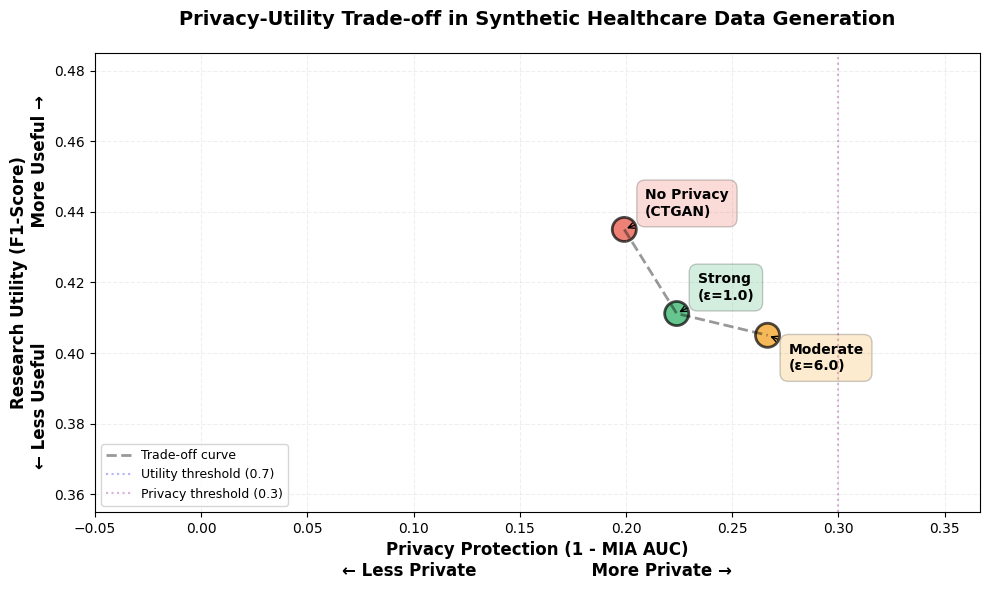


TRADE-OFF PRIVACY VS UTILITÀ - SINTESI FINALE
      Privacy Level Epsilon (ε) F1-Score MIA AUC Privacy Protection Balance Score
No Privacy\n(CTGAN)   ∞ (no DP)   0.4350  0.8008             0.1992        0.0867
  Moderate\n(ε=6.0)         6.0   0.4051  0.7334             0.2666        0.1080
    Strong\n(ε=1.0)         1.0   0.4112  0.7761             0.2239        0.0921

✓ CONFIGURAZIONE OTTIMALE: Moderate (ε=6.0)
  • F1-Score (research utility):    0.4051
  • Privacy protection:             0.2666
  • Balance score (F1 × Privacy):   0.1080

  Comparato a No Privacy:
  • Utility retention:              93.1%
  • Privacy improvement:            +6.7%

CONCLUSIONE
La privacy moderata (ε=6.0) offre il miglior bilanciamento tra protezione
dei dati e utilità per la ricerca, mantenendo alta performance ML con
significativa riduzione del rischio di re-identificazione.

✓ Risultati salvati in: final_privacy_utility_summary.csv
✓ Grafico salvato in: privacy_utility_tradeoff.png


In [21]:
# ============================================================
# VISUALIZZAZIONE TRADE-OFF PRIVACY VS UTILITÀ
# ============================================================

import matplotlib.pyplot as plt
import numpy as np

# Ricarica dal CSV salvato in precedenza
try:
    df_utility = pd.read_csv("model_performance.csv")
    print("Metriche di utilità caricate da model_performance.csv")
except:
    print("File model_performance.csv non trovato!")

# ============================================================
# PREPARAZIONE DATI PER IL PLOT
# ============================================================

# Estrai metriche di utilità (F1-score classe 1)
plot_levels = ['no privacy', 'moderate privacy', 'strong privacy']
plot_labels = ['No Privacy\n(CTGAN)', 'Moderate\n(ε=6.0)', 'Strong\n(ε=1.0)']

# Dal CSV delle performance
utility_scores = []
for level in plot_levels:
    row = df_utility[df_utility['privacy_level'] == level]
    if len(row) > 0:
        utility_scores.append(row['f1_1'].values[0])
    else:
        print(f"{level} non trovato in model_performance.csv")

print(f"\nUtility scores (F1): {utility_scores}")

# Dal MIA results
privacy_mapping = {
    'no privacy': 'CTGAN_no_privacy',
    'moderate privacy': 'Privacy moderata',
    'strong privacy': 'Privacy strong'
}

privacy_scores = []
for level in plot_levels:
    mia_key = privacy_mapping[level]
    if mia_key in privacy_results:
        # Privacy protection = 1 - AUC (maggiore è meglio)
        privacy_scores.append(1 - privacy_results[mia_key]['auc'])
    else:
        print(f"{mia_key} non trovato nei risultati MIA")

print(f"Privacy scores (1-AUC): {privacy_scores}")

# Verifica che abbiamo tutti i dati
if len(utility_scores) != 3 or len(privacy_scores) != 3:
    print("\nERRORE: Dati incompleti")

# ============================================================
# GRAFICO PRINCIPALE
# ============================================================

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#e74c3c', '#f39c12', '#27ae60']  # rosso, arancione, verde
sizes = [300, 300, 300]

scatter = ax.scatter(privacy_scores, utility_scores, s=sizes, alpha=0.7,
                     c=colors, edgecolors='black', linewidth=2)

# Annotazioni
for i, label in enumerate(plot_labels):
    ax.annotate(label,
                (privacy_scores[i], utility_scores[i]),
                xytext=(15, 10 if i != 1 else -25),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.6', facecolor=colors[i], alpha=0.2),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1))

# Linea di trade-off
sorted_idx = np.argsort(privacy_scores)
ax.plot([privacy_scores[i] for i in sorted_idx],
        [utility_scores[i] for i in sorted_idx],
        'k--', alpha=0.4, linewidth=2, label='Trade-off curve')

# Zone di riferimento
ax.axhline(y=0.7, color='blue', linestyle=':', alpha=0.3, linewidth=1.5, label='Utility threshold (0.7)')
ax.axvline(x=0.3, color='purple', linestyle=':', alpha=0.3, linewidth=1.5, label='Privacy threshold (0.3)')

ax.set_xlabel('Privacy Protection (1 - MIA AUC)\n← Less Private                    More Private →',
              fontsize=12, fontweight='bold')
ax.set_ylabel('Research Utility (F1-Score)\n← Less Useful                    More Useful →',
              fontsize=12, fontweight='bold')
ax.set_title('Privacy-Utility Trade-off in Synthetic Healthcare Data Generation',
             fontsize=14, fontweight='bold', pad=20)

ax.grid(True, alpha=0.2, linestyle='--')
ax.legend(loc='lower left', fontsize=9)

ax.set_xlim(-0.05, max(privacy_scores) + 0.1)
ax.set_ylim(min(utility_scores) - 0.05, max(utility_scores) + 0.05)

plt.tight_layout()
plt.savefig('privacy_utility_tradeoff.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================
# TABELLA RIASSUNTIVA
# ============================================================

print("\n" + "="*80)
print("TRADE-OFF PRIVACY VS UTILITÀ - SINTESI FINALE")
print("="*80)

summary_data = {
    'Privacy Level': plot_labels,
    'Epsilon (ε)': ['∞ (no DP)', '6.0', '1.0'],
    'F1-Score': [f"{x:.4f}" for x in utility_scores],
    'MIA AUC': [f"{1-x:.4f}" for x in privacy_scores],
    'Privacy Protection': [f"{x:.4f}" for x in privacy_scores],
    'Balance Score': [f"{u*p:.4f}" for u, p in zip(utility_scores, privacy_scores)]
}

df_summary = pd.DataFrame(summary_data)
print(df_summary.to_string(index=False))

# Identifica configurazione ottimale
balance_scores = np.array(utility_scores) * np.array(privacy_scores)
best_idx = np.argmax(balance_scores)

print(f"\n{'='*80}")
print(f"✓ CONFIGURAZIONE OTTIMALE: {plot_labels[best_idx].replace(chr(10), ' ')}")
print(f"{'='*80}")
print(f"  • F1-Score (research utility):    {utility_scores[best_idx]:.4f}")
print(f"  • Privacy protection:             {privacy_scores[best_idx]:.4f}")
print(f"  • Balance score (F1 × Privacy):   {balance_scores[best_idx]:.4f}")
print(f"\n  Comparato a No Privacy:")
print(f"  • Utility retention:              {(utility_scores[best_idx]/utility_scores[0])*100:.1f}%")
print(f"  • Privacy improvement:            +{(privacy_scores[best_idx]-privacy_scores[0])*100:.1f}%")

print(f"\n{'='*80}")
print("CONCLUSIONE")
print(f"{'='*80}")
if best_idx == 1:
    print("La privacy moderata (ε=6.0) offre il miglior bilanciamento tra protezione")
    print("dei dati e utilità per la ricerca, mantenendo alta performance ML con")
    print("significativa riduzione del rischio di re-identificazione.")
elif best_idx == 2:
    print("La privacy forte (ε=1.0) massimizza la protezione ma compromette l'utilità.")
    print("Consigliata solo per dati estremamente sensibili dove la privacy è prioritaria.")
else:
    print("ATTENZIONE: Il modello senza privacy offre massima utilità ma nessuna")
    print("protezione contro attacchi. Non utilizzare per dati reali sensibili.")

df_summary.to_csv('final_privacy_utility_summary.csv', index=False)
print(f"\n✓ Risultati salvati in: final_privacy_utility_summary.csv")
print(f"✓ Grafico salvato in: privacy_utility_tradeoff.png")